In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditcard_hugefraud.csv', na_filter=True)

In [2]:
not_fraud_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))


Number of nonfraudulent transactions: 199251
Number of fraudulent transactions: 85556


In [3]:
not_fraud_df = df.loc[df['Class'] == 0][:85556]
equalized_df = pd.concat([fraud_df, not_fraud_df])
equalized_df = equalized_df.sample(frac = 1, random_state = 42)
not_fraud_df = equalized_df[equalized_df['Class'] == 0]
fraud_df = equalized_df[equalized_df['Class'] == 1]

print("Number of nonfraudulent transactions: " + str(len(not_fraud_df.index)))
print("Number of fraudulent transactions: " + str(len(fraud_df.index)))

Number of nonfraudulent transactions: 85556
Number of fraudulent transactions: 85556


In [4]:
equalized_df.corr()
equalized_df.columns


Index(['Time', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9',
       'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
       'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27',
       'PC28', 'Amount', 'Class'],
      dtype='object')

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(equalized_df['Time'].values.reshape(-1, 1))
equalized_df['Time'] = scaler.fit_transform(equalized_df['Time'].values.reshape(-1, 1))
scaler.fit(equalized_df['Amount'].values.reshape(-1, 1))
equalized_df['Amount'] = scaler.fit_transform(equalized_df['Amount'].values.reshape(-1, 1))

/tmp/ipykernel_5175/2678689468.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


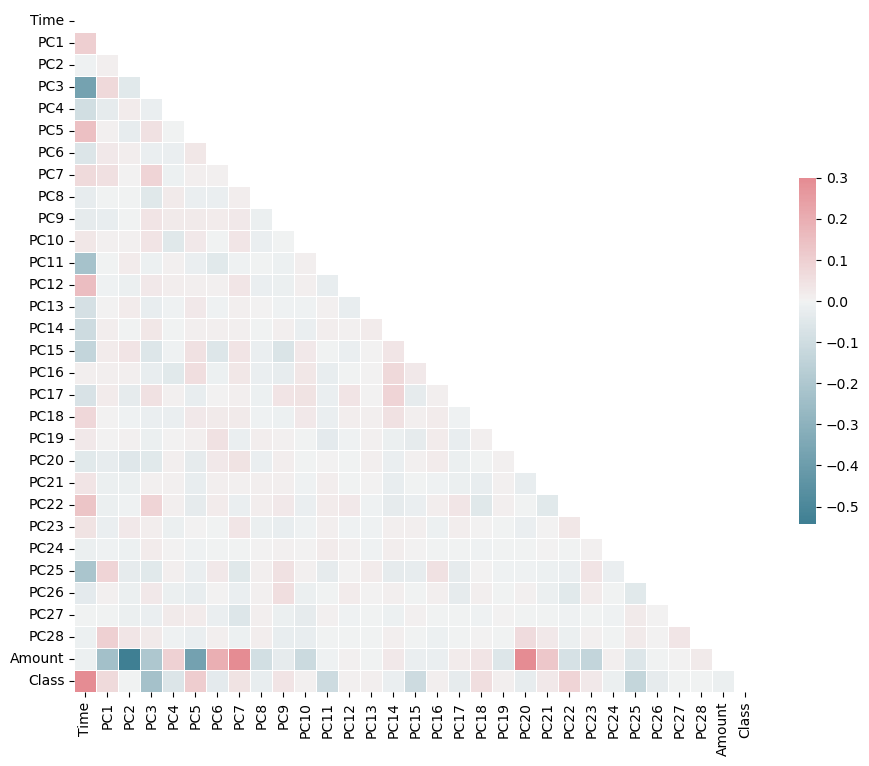

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_corr(df):
    corr=df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plot_corr(equalized_df)

array([<AxesSubplot: ylabel='a'>, <AxesSubplot: ylabel='b'>], dtype=object)

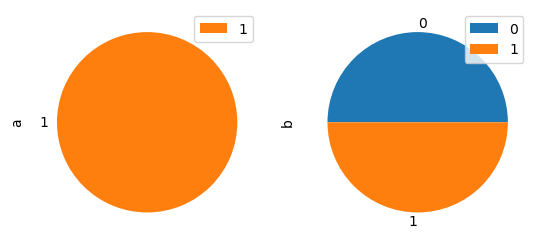

In [7]:
import matplotlib.pyplot as plt

not_fraud = len(equalized_df[equalized_df['Class'] == 0].values)
fraud = len(equalized_df[equalized_df['Class'] == 1].values)

pie_chart = pd.DataFrame({'a': [0, 1],'b': [not_fraud, fraud]})
pie_chart.plot.pie(subplots=True)

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

training,test = train_test_split(equalized_df, train_size = 0.7, test_size = 0.3, shuffle=True)
training_1, valid = train_test_split(training, train_size = 0.7, test_size =0.3, shuffle=True) 


training_label = training.pop('Class')
test_label = test.pop('Class')
valid_label = valid.pop('Class')
import pprint
pp = pprint.PrettyPrinter(indent=4)

nbc = GaussianNB()



import time
import datetime

# start time
start_time = time.time()
datetime_obj1 = datetime.datetime.fromtimestamp(start_time)
print(f"Start time: {datetime_obj1}")

 


# Fit the model to your data

nbc.fit(training, training_label)
# end time
end_time = time.time()
datetime_obj2 = datetime.datetime.fromtimestamp(end_time)

# calculate the difference between start and end times in seconds
duration = end_time - start_time

# display the results
print(f"End time: {datetime_obj2}")
print(f"Duration: {duration} seconds")


nbc_predict = nbc.predict(test)
accuracy = dict()
accuracy['Naive_bayes'] = accuracy_score(test_label, nbc_predict)
pp.pprint(accuracy)
test_predictions = nbc.predict(test)


Start time: 2023-03-13 02:04:10.851301
End time: 2023-03-13 02:04:10.903543
Duration: 0.05224156379699707 seconds
{'Naive_bayes': 0.7478084700198698}


In [9]:
nbc_predict = nbc.predict(valid)


In [10]:
pp.pprint(accuracy)


{'Naive_bayes': 0.7478084700198698}


In [13]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_label, test_predictions)

# Print the confusion matrix
print("Naive_bayes Confusion Matrix:")
print(cm)


Naive_bayes Confusion Matrix:
[[23901  1824]
 [11122 14487]]


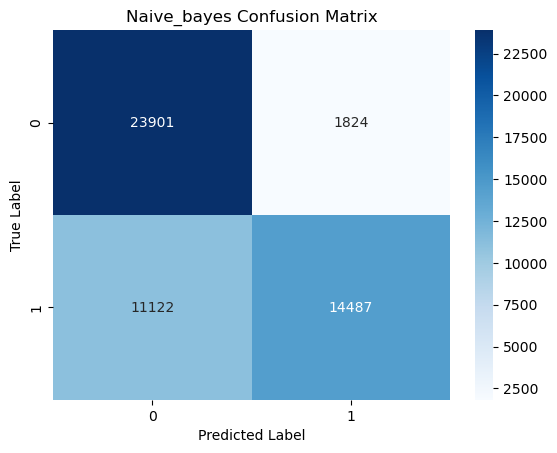

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Naive_bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()